In [112]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from generate_paths import random_path, noise_path
from set_lsh import SetLSH, jaccard


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
def plot_paths(paths):
    for path in paths:
        xs, ys = zip(*path)
        plt.plot(xs, ys)
        
    plt.ylim(0, 20)
    plt.xlim(0, 20)
    plt.show()

def generate_paths(min_len, max_len, max_coord, n, noise):
    # Generate paths
    paths = [random_path(min_len, max_len, max_coord) for _ in range(n)]
    
    # Add noise to paths
    def noise_fn():
        return int(np.random.normal(0, noise)), int(np.random.normal(0, noise))
    noisy_paths = [noise_path(path, noise_fn) for path in paths]

    return paths, noisy_paths

def lsh_experiment(b, k, paths=None, noisy_paths=None, compare=None):
    # Create LSH
    lsh = SetLSH(b, k)
    
    # Add non-noisy paths into hash
    for path in paths_set:
        lsh.insert(path)
    
    # Stores how different is the Jaccard distance between the retreived path and
    # original path
    dists, costs = [], []
    
    paths = paths or paths_set
    noisy_paths = noisy_paths or noisy_paths_set
    compare = compare or paths_set
    
    for path, noisy_path, comp in zip(paths, noisy_paths, compare):
        res, cost = lsh.query(noisy_path)
        dists.append(jaccard(res, comp))
        costs.append(cost)

    return dists, costs

def add_noise(paths):
    new_paths = []
    for path in paths:
        new_path = set()
        for x, y in path:
            new_path.update([(x, y), (x+1, y), (x, y+1), (x-1, y), (x, y-1),
                             (x+2, y), (x, y+2), (x-2, y), (x, y-2),
                             (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1),
                            ])
        new_paths.append(new_path)
    return new_paths

def count(lst):
    return sum(d == 1 for d in lst)

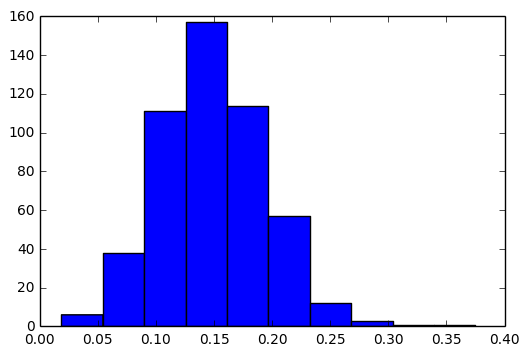

In [113]:
paths, noisy_paths = generate_paths(10, 25, 30, 500, 2.5)

# Plot paths
#plot_paths(paths)
#plot_paths(noisy_paths)

# Turn paths into sets
paths_set = map(set, paths)
noisy_paths_set = map(set, noisy_paths)

# Histogram of jaccard distance between paths and noisy paths
plt.hist([jaccard(paths_set[i], noisy_paths_set[i]) for i in range(len(paths_set))])
plt.show()

In [0]:
i = 60
plot_paths([paths[i]])
plot_paths([noisy_paths[i]])

In [0]:
dists, costs = lsh_experiment(5, 1)
plt.hist(dists)
plt.show()
plt.hist(costs)
plt.show()

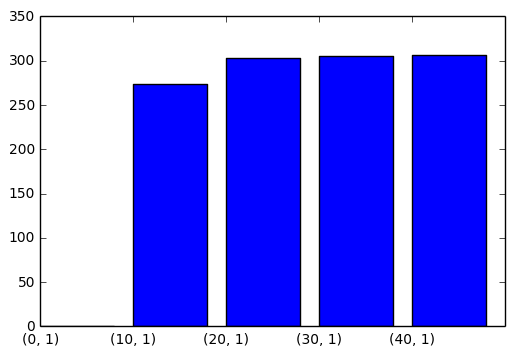

In [121]:
vals = [(1, 24), (2, 12), (3, 8), (4, 6), (6, 4), (8, 3), (12, 2), (24, 1)]
vals = [(10*i, 1) for i in range(5)]
matches = []

for b, k in vals:
    dists, costs = lsh_experiment(b, k)
    matches.append(count(dists))

x = range(len(vals))
plt.bar(x, matches)
plt.xticks(x, vals)
plt.show()

In [129]:
pn = add_noise(paths_set)
npn = add_noise(noisy_paths_set)

#plt.hist(lsh_experiment(20, 1)[1])
#plt.show()
#plt.hist(lsh_experiment(20, 1, paths=pn, compare=paths_set)[1])
#plt.show()
#plt.hist(lsh_experiment(20, 1, noisy_paths=npn, compare=paths_set)[1])
#plt.show()
#plt.hist(lsh_experiment(20, 1, paths=pn, noisy_paths=npn, compare=paths_set)[1])
#plt.show()

print count(lsh_experiment(20, 1)[0])
print count(lsh_experiment(20, 1, paths=pn, compare=paths_set)[0])
print count(lsh_experiment(20, 1, noisy_paths=npn, compare=paths_set)[0])
print count(lsh_experiment(20, 1, paths=pn, noisy_paths=npn, compare=paths_set)[0])

224


225


303


301
